In [1]:
# 读入数据，获得输入X和输出Y
import pandas as pd
data=pd.read_csv('5_train_classification.csv')
X = data.drop(columns='Y', inplace=False)
Y = data.get('Y')


In [2]:
# 数据预处理，将原始数据标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [3]:
# 5次5折交叉验证
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0) #种子设为0

In [4]:
# 创建神经网络模型
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
mlp = MLPClassifier(hidden_layer_sizes=(100), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
mlp.fit(X_std, Y)
ACC = cross_val_score(mlp, X_std, Y, cv=rkf,scoring='accuracy').mean()
print('Accuracy:',ACC)

Accuracy: 0.96125


In [7]:
# 超参数调优
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
parameters = {'hidden_layer_sizes': [(10,10,10,10,10),(20,20,20,20,20),(30,30,30,30,30),(40,40,40,40,40),(50,50,50,50,50),(60,60,60,60,60),(70,70,70,70,70),(80,80,80,80,80),(90,90,90,90,90),(100,100,100,100,100)],
                'activation': ['identity', 'logistic','tanh', 'relu'],
                'solver': ['adam','lbgfs','sgd'],
                'alpha': [0.0001, 0.001, 0.01, 0.1, 1,10,100],
                'learning_rate': ['constant', 'invscaling', 'adaptive']}
grid = GridSearchCV(mlp, parameters, cv=rkf, scoring='accuracy',n_jobs=-1)
grid.fit(X_std, Y)
print('最优参数：',grid.best_params_)
print('最优模型得分：',grid.best_score_)


最优参数： {'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (100, 100, 100, 100, 100), 'learning_rate': 'constant', 'solver': 'adam'}
最优模型得分： 0.965


In [5]:
# 保存模型
import joblib
joblib.dump(grid.best_params_, 'mlp_classification.pkl')

['mlp_classification.pkl']

In [26]:
# 读取模型
import joblib
mlp_classification = joblib.load('mlp_classification.pkl')

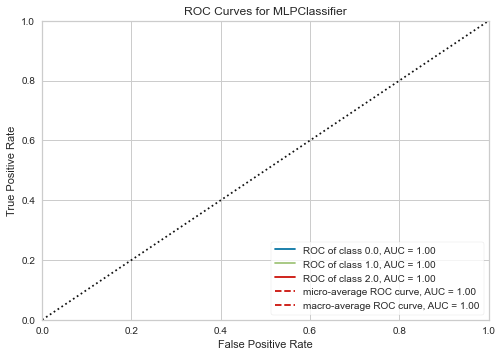

In [27]:
from yellowbrick.classifier import ROCAUC
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=0.2, random_state=0)
visualizer = ROCAUC(mlp_classification)
visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)  
g = visualizer.poof()             

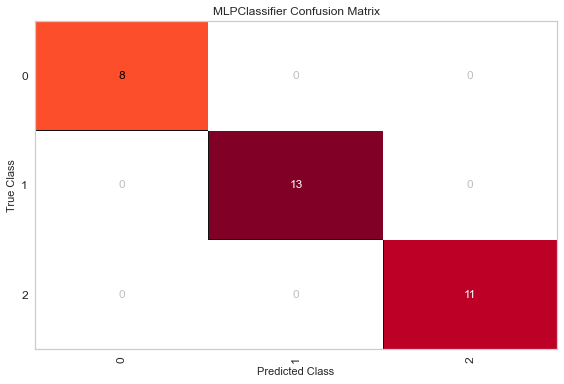

<AxesSubplot:title={'center':'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [28]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(mlp_classification, classes=[0,1,2])
cm.fit(X_train, Y_train)
cm.score(X_test, Y_test)
cm.poof()

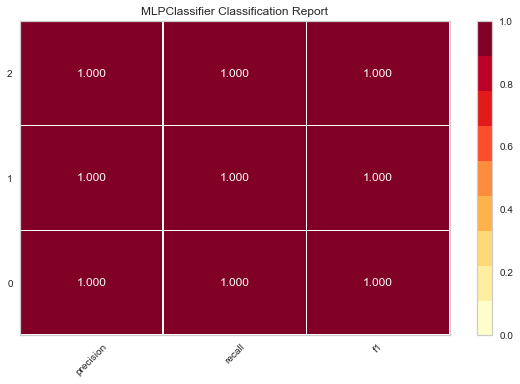

In [29]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(mlp_classification, classes=[0,1,2])
visualizer.fit(X_train, Y_train) 
visualizer.score(X_test, Y_test)  
g = visualizer.poof()             